### Business Case for Building a Predictive Model to Understand Employee Attrition

#### 1. Business Understanding

**1.1 Determine Business Objectives**
The primary objective is to reduce employee attrition rates by understanding the key characteristics that influence why employees leave the firm. High attrition rates can lead to increased recruitment and training costs, loss of organizational knowledge, and reduced employee morale.

**1.2 Assess Situation**
- **Current State:** The firm is experiencing an annual attrition rate of 16%, which is higher than the industry average of 12%.
- **Resources Available:**
  - **Data:** Employee demographics, job roles, tenure, performance ratings, salary information, and exit interviews.
  - **People:** HR team, data analysts, and IT support.
  - **Technology:** Data storage systems, data analysis software, and computing resources.

**1.3 Determine Data Mining Goals**
- Develop a predictive model to identify the factors that contribute to employee attrition.
- Use the model to predict which employees are at a high risk of leaving.
- Provide actionable insights to the HR department to develop targeted retention strategies.

**1.4 Produce Project Plan**
- **Phase 1:** Data Collection and Understanding (2 weeks)
- **Phase 2:** Data Preparation (3 weeks)
- **Phase 3:** Modeling (4 weeks)
- **Phase 4:** Evaluation (2 weeks)
- **Phase 5:** Deployment (3 weeks)
- **Phase 6:** Monitoring and Maintenance (ongoing)

#### 2. Data Understanding

**2.1 Collect Initial Data**
- Gather data from HR databases, including employee demographics, job history, performance reviews, and exit interview feedback.

**2.2 Describe Data**
- Data set includes attributes such as age, gender, education level, job role, tenure, performance rating, salary, and whether the employee has left the firm.

**2.3 Explore Data**
- Use statistical methods and visualization tools to identify patterns and relationships within the data.

**2.4 Verify Data Quality**
- Check for missing values, duplicates, and inconsistencies. Ensure data accuracy and completeness.

#### 3. Data Preparation

**3.1 Select Data**
- Identify relevant attributes such as age, job role, tenure, and performance rating.

**3.2 Clean Data**
- Handle missing values, correct errors, and remove duplicates.

**3.3 Construct Data**
- Create new features if necessary, such as tenure categories or performance trends.

**3.4 Integrate Data**
- Combine data from different sources to create a comprehensive data set.

**3.5 Format Data**
- Organize the data into a structure suitable for modeling, such as a clean and normalized table.

#### 4. Modeling

**4.1 Select Modeling Techniques**
- Choose techniques such as logistic regression, decision trees, and random forests.

**4.2 Generate Test Design**
- Split data into training and test sets to evaluate model performance.

**4.3 Build Model**
- Apply selected modeling techniques to the training data to build the predictive models.

*Models Built*
1. Logistic Regression Model
2. Discriminant Analysis
  Linear and Quadratic
3. Desccision Tree
4. Random Forest
5. XGBoost

**4.4 Assess Model**
- Evaluate model performance using metrics such as accuracy, precision, recall, and ROC-AUC.

#### 5. Evaluation

**5.1 Evaluate Results**
- Assess the model's performance in predicting employee attrition. Ensure it meets the business objectives.

**5.2 Review Process**
- Review all steps taken to ensure they align with the goals and that the methodology was correctly applied.

**5.3 Determine Next Steps**
- Decide whether to proceed with model deployment, make adjustments to the model, or conduct further iterations.

#### 6. Deployment

**6.1 Plan Deployment**
- Develop a strategy to integrate the predictive model into the HR systems for ongoing use.

**6.2 Monitor and Maintain**
- Set up regular monitoring to track the model’s performance and update it as necessary.

**6.3 Review Project**
- Conduct a final review to document the project’s successes and areas for improvement.

**6.4 Produce Final Report**
- Create a detailed report summarizing the project, including findings, model performance, and recommendations.




### Package Imports

In [9]:
# -*- coding: utf-8 -*-
"""
Created on Thu June 15 17:37:49 2024

@author: Sumaila
"""

# Libraries

import pandas as pd
# Needed for data i/o
import numpy as np
# Needed for linear algebra operations
import pickle
# Needed for model export
import seaborn as sns
# Needed for data visualisation
from scipy.stats import ttest_ind,randint
# Needed for T-test
import matplotlib.pyplot as plt
# Needed for data visualisation
from PIL import Image, ImageDraw, ImageFont
# Needed for text to image conversion
from sklearn import tree
# Needed for decision tree
from sklearn.linear_model import LogisticRegression
# Needed for logistic regression
from sklearn.ensemble import RandomForestClassifier
# Needed for random forest
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# Needed for discriminant analysis
from imblearn.over_sampling import SMOTE
# TODO: Why do we need this.
from sklearn.model_selection import train_test_split
# TODO: Why do we need this.
from sklearn.metrics import precision_score, recall_score, f1_score
# TODO: Why do we need this.
from sklearn.tree import DecisionTreeClassifier, plot_tree
# Needed for decision tree
from sklearn.model_selection import train_test_split
# Needed for train-test split
from sklearn.preprocessing import MinMaxScaler
# Needed for feature scaling
from sklearn.preprocessing import StandardScaler
# Needed for Data Preprocessing. ie: Standardized Scaling
from sklearn.metrics import confusion_matrix
# Needed for confusion matrix. ie: model accuracy
from sklearn.metrics import classification_report
# Needed for classification report. ie: precision, recall, f1-score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
# Needed for parameterization. ie. determining the best set of parameters
# that optimizes the model outcome.
from scipy import stats
# Needed for Chi Squared test
from sklearn import metrics
# Needed for model evaluation
from sklearn.model_selection import cross_val_score
# Needed for model cross validation.
import warnings
warnings.filterwarnings('ignore')
# Needed for ignoring warnings

### Functions

In [10]:
# Functions

# This is needed for converting the text outputs into images.
def text_to_image(text1, text2, font_path=None, font_size=20):
    # Combine the two text inputs
    combined_text = text1.strip() + "\n\n" + text2.strip()

    lines = combined_text.split('\n')
    max_width = max([len(line) for line in lines])
    width = max_width * (font_size // 2)
    height = len(lines) * font_size * 1.5

    image = Image.new('RGB', (int(width), int(height)), color='white')
    draw = ImageDraw.Draw(image)

    if font_path:
        font = ImageFont.truetype(font_path, font_size)
    else:
        font = ImageFont.load_default()

    y_text = 0
    for line in lines:
        text_width = draw.textlength(line, font=font) # Get the width of the text
        draw.text(((text_width // 2) - 10, y_text), line, font=font, fill='black')
        y_text += font_size * 1.5 # Estimate height based on font size

    return image



# This is needed to plot all the continiuous variables whiles saving the image in google drive
def plot_continuous_variables(df, predictive_variable, continuous_variable, predictive_variable_value_0, 
                              predictive_variable_value_1, image_file_name):
    x1 = list(df[df[predictive_variable] == predictive_variable_value_0][continuous_variable])
    x2 = list(df[df[predictive_variable] == predictive_variable_value_1][continuous_variable])

    plt.figure(figsize=(12, 4))
    sns.set_context('paper', font_scale=1.2)

    plt.hist([x1, x2], bins=40, density=False, color=['#ff9999','#66b3ff'])
    plt.legend(['No', 'Yes'], title='Attrition', loc='upper right', facecolor='white')
    plt.xlabel(f'{continuous_variable}')
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {continuous_variable} by Attrition Status', size=30)
    plt.box(False)
    save_path = f'{image_file_name}'
    plt.savefig(save_path)


# This is needed to plot all a correlation matrix for the continuous variables whiles saving the image in google drive
def correlation_matrix(df, image_file_name):
  correlation = df.select_dtypes(include=["int64", "float64"]).corr()  # .corr is used to find corelation
  f, ax = plt.subplots(figsize=(20, 10))
  sns.heatmap(correlation, cbar=True, square=True, annot=False, fmt='.1f',
            xticklabels=True, yticklabels=True
            , cmap="coolwarm", linewidths=.5, ax=ax)
  plt.title('CORRELATION MATRIX - HEATMAP', size=18)
  save_path = f'{image_file_name}'
  plt.savefig(save_path)



# This is needed to import the data from google drive
def data_import(File_name):
  # Mount google drive
  df = pd.read_csv(File_name)
  # Load the data as a pandas dataframe
  data = df
  # Make copies of the data and prepares it for exporting from the function
  return data




def evaluate_model_with_cv(model, X_train, y_train, y_test, y_pred, target_names, image_file='classification_report.png', chart_name = ""):
    """
    Evaluates a classification model using 5-fold CV and classification report,
    and generates a styled image summary.
    """
    # Cross-validation
    cv_scores = cross_val_score(model, X_train, y_train, cv=5)
    avg_cv = np.mean(cv_scores)
    std_cv = np.std(cv_scores)

    # Classification report
    report = classification_report(y_test, y_pred, target_names=target_names)

    # Prepare text content
    summary_text = f"5-Fold CV Avg: {avg_cv:.4f} | Std Dev: {std_cv:.4f}"
    report_lines = report.strip().split('\n')
    
    # Plot setup
    plt.figure(figsize=(10, 6))
    plt.axis('off')
    plt.gca().set_facecolor('#ecf0f1')
    
    # Fonts
    title_font = {'fontsize': 15, 'fontweight': 'bold', 'color': '#2c3e50'}
    text_font = {'fontsize': 11, 'color': '#34495e', 'family': 'monospace'}

    # Header
    plt.text(0.5, 1.02, f'{chart_name}', ha='center', **title_font)
    plt.text(0.5, 0.97, summary_text, ha='center', fontsize=11, color='#16a085')

    # Classification report
    y_pos = 0.88
    for line in report_lines:
        plt.text(0.01, y_pos, line, ha='left', **text_font)
        y_pos -= 0.045

    # Save and close
    plt.tight_layout()
    plt.savefig(image_file, dpi=300, bbox_inches='tight', facecolor='#ecf0f1')
    plt.close()
    
    print(f"Classification report saved to {image_file}")



def plot_confusion_matrix(y_true, y_pred, labels=None, title="Confusion Matrix", image_file="confusion_matrix.png", figsize=(4, 3), cmap="Blues"):
    """
    Plots and saves a confusion matrix heatmap.

    Parameters:
    - y_true: Actual target labels
    - y_pred: Predicted labels
    - labels: List of labels for axes [‘Class1’, ‘Class2’]
    - title: Title of the plot
    - image_file: Filename to save the plot
    - figsize: Tuple for figure size
    - cmap: Colormap for heatmap
    """
    if labels is None:
        labels = sorted(list(set(y_true)))

    cm = confusion_matrix(y_true, y_pred, labels=labels)

    plt.figure(figsize=figsize)
    sns.heatmap(cm, annot=True, fmt="d", cmap=cmap,
                xticklabels=labels,
                yticklabels=labels)

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.title(title)
    plt.tight_layout()

    plt.savefig(image_file)
    plt.close()
    print(f"Confusion matrix saved to: {image_file}")



def visualize_decision_tree(model, feature_names=None, class_names=None, figsize=(20,10), image_file="figure_1.png"):
    """
    Visualizes a decision tree using matplotlib.
    
    Parameters:
    - model: trained DecisionTreeClassifier or DecisionTreeRegressor
    - feature_names: list of feature names (optional)
    - class_names: list of class names (for classification)
    - figsize: size of the figure
    """
    plt.figure(figsize=figsize)
    plot_tree(model, 
              feature_names=feature_names, 
              class_names=class_names,
              filled=True, 
              rounded=True, 
              fontsize=10)
    plt.title("Decision Tree Visualization")
    plt.savefig(image_file)
    plt.show()


def plot_top_features(model, feature_names, model_type='tree', top_n=10, save_path='top_features.png'):
    """
    Creates and saves an image of the top N features by importance or coefficient value.

    Parameters:
        model: Trained model (e.g., RandomForest or LogisticRegression).
        feature_names: List of feature names corresponding to model input.
        model_type: Type of model - 'tree' or 'logistic'.
        top_n: Number of top features to display.
        save_path: Path where the image will be saved.
    """
    
    if model_type == 'tree':
        if not hasattr(model, 'feature_importances_'):
            raise AttributeError("The model does not have 'feature_importances_'. Did you choose the correct model_type?")
        importances = model.feature_importances_
        importances_label = "Importance"

    elif model_type == 'logistic':
        if not hasattr(model, 'coef_'):
            raise AttributeError("The model does not have 'coef_'. Did you choose the correct model_type?")
        # Flatten and take absolute values for importance ranking
        importances = np.abs(model.coef_.ravel())
        importances_label = "Coefficient Magnitude"

    else:
        raise ValueError("model_type must be either 'tree' or 'logistic'")

    # Create DataFrame
    feat_df = pd.DataFrame({
        'Feature': feature_names,
        importances_label: importances
    })

    # Sort and select top N
    top_feats = feat_df.sort_values(by=importances_label, ascending=False).head(top_n)

    # Plot
    plt.figure(figsize=(10, 6))
    plt.barh(top_feats['Feature'][::-1], top_feats[importances_label][::-1], color='skyblue')
    plt.xlabel(importances_label)
    plt.title(f'Top {top_n} Features ({model_type.title()} Model)')
    plt.tight_layout()
    
    # Save plot
    plt.savefig(save_path, dpi=300)
    plt.close()
    print(f"Saved top {top_n} feature plot to {save_path}")
  

def evaluate_model(model, X_train, y_train, X_test, y_test, save_path='metrics_output.png', model_name=""):
    """
    Trains and evaluates a Logistic Regression model, and saves the evaluation metrics as a styled image.

    Parameters:
        model: A scikit-learn LogisticRegression instance.
        X_train, y_train: Training data.
        X_test, y_test: Testing data.
        save_path: Path to save the output image.
        model_name: Custom name for the model to show in the image.
    """
    # Train the model
    model.fit(X_train, y_train)

    # Predict
    y_pred = model.predict(X_test)

    # Metrics
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Prepare metrics dictionary
    metrics = {
        "Model": model_name,
        "Training Score": train_score,
        "Test Score": test_score,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1
    }

    # Create a modern styled image
    plt.figure(figsize=(8, 5))
    plt.axis('off')

    # Styling
    title_font = {'fontsize': 16, 'fontweight': 'bold', 'color': '#2c3e50'}
    text_font = {'fontsize': 13, 'color': '#34495e'}

    # Title
    plt.text(0.5, 0.85, metrics["Model"], ha='center', **title_font)

    # Display each metric line by line
    spacing = 0.70
    for k in list(metrics.keys())[1:]:
        plt.text(0.5, spacing, f"{k}: {metrics[k]:.2f}", ha='center', **text_font)
        spacing -= 0.10

    # Background color
    plt.gca().set_facecolor('#ecf0f1')
    plt.tight_layout()
    plt.savefig(save_path, dpi=300, bbox_inches='tight', facecolor='#ecf0f1')
    plt.close()

    print(f"Metrics image saved to {save_path}")
    return Image.open(save_path), y_pred


### Data Import

In [11]:
# Call the data import function and save the data as df and df_copy
df = data_import('HR data.csv')

### Check for Count of missing values in the data

In [12]:
# Checking for missing values
print(df.isnull().sum())

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

### Check for data type

In [13]:

# Checking for variable type
df.dtypes

Age                          int64
Attrition                    int64
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                   object
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction     object
Gender                      object
HourlyRate                   int64
JobInvolvement              object
JobLevel                    object
JobRole                     object
JobSatisfaction             object
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating           object
RelationshipSatisfaction    object
StandardHours                int64
StockOptionLevel            object
TotalWorkingYears   

### Check for data type of each feature

In [14]:

# Checking for variable type
df.dtypes

Age                          int64
Attrition                    int64
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                   object
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction     object
Gender                      object
HourlyRate                   int64
JobInvolvement              object
JobLevel                    object
JobRole                     object
JobSatisfaction             object
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating           object
RelationshipSatisfaction    object
StandardHours                int64
StockOptionLevel            object
TotalWorkingYears   

### Convert all numberical variables to int64 and all categorical variables to category from object. 

In [15]:
 # List of categorical variables
categorical_variables = list(df.select_dtypes(include=['object']).columns)

# List of numerical variables
numerical_variables = df.select_dtypes(include=["int64", "float64"]).columns.tolist()

# Set the data type of the all categorical and numerical variables
for i in categorical_variables:
    df[i] = df[i].astype("category")


for j in numerical_variables:
    df[j] = df[j].astype("int64")

del[i, j]

### Sanity Check for the previous operation

In [16]:
# Check for spelling inconsistencies in categorical variables
# Inspect the data types
df.dtypes

Age                            int64
Attrition                      int64
BusinessTravel              category
DailyRate                      int64
Department                  category
DistanceFromHome               int64
Education                   category
EducationField              category
EmployeeCount                  int64
EmployeeNumber                 int64
EnvironmentSatisfaction     category
Gender                      category
HourlyRate                     int64
JobInvolvement              category
JobLevel                    category
JobRole                     category
JobSatisfaction             category
MaritalStatus               category
MonthlyIncome                  int64
MonthlyRate                    int64
NumCompaniesWorked             int64
Over18                      category
OverTime                    category
PercentSalaryHike              int64
PerformanceRating           category
RelationshipSatisfaction    category
StandardHours                  int64
S

# Exploratory  Data Analysis

### Univariate Exploratory Analysis for the categorical variables. 


In [17]:
for i in categorical_variables:
  print("============================")
  print(df[i].value_counts())
  print("============================")


BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64
Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64
Education
Bachelor         572
Master           398
College          282
Below College    170
Doctor            48
Name: count, dtype: int64
EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: count, dtype: int64
EnvironmentSatisfaction
High         453
Very High    446
Medium       287
Low          284
Name: count, dtype: int64
Gender
Male      882
Female    588
Name: count, dtype: int64
JobInvolvement
High         868
Medium       375
Very High    144
Low           83
Name: count, dtype: int64
JobLevel
Very Low     543
Low          534
Medium       218
High         106
Very High     69
Name: count, dtype: int64
JobRole
Sales Execut

### Univariate Exploratory Analysis for the numerical variables. 


In [18]:
# Basic Exploratory Data Analysis for categorical variables

for i in categorical_variables:
    print("============================")
    print(df[i].value_counts())
    print("============================")

# Basic Exploratory Data Analysis for Continuous variables
for j in numerical_variables:
    print("============================")
    print(df[j].describe())
    print("============================")
del[i, j]

BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64
Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64
Education
Bachelor         572
Master           398
College          282
Below College    170
Doctor            48
Name: count, dtype: int64
EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: count, dtype: int64
EnvironmentSatisfaction
High         453
Very High    446
Medium       287
Low          284
Name: count, dtype: int64
Gender
Male      882
Female    588
Name: count, dtype: int64
JobInvolvement
High         868
Medium       375
Very High    144
Low           83
Name: count, dtype: int64
JobLevel
Very Low     543
Low          534
Medium       218
High         106
Very High     69
Name: count, dtype: int64
JobRole
Sales Execut

### Plot the Response variable 

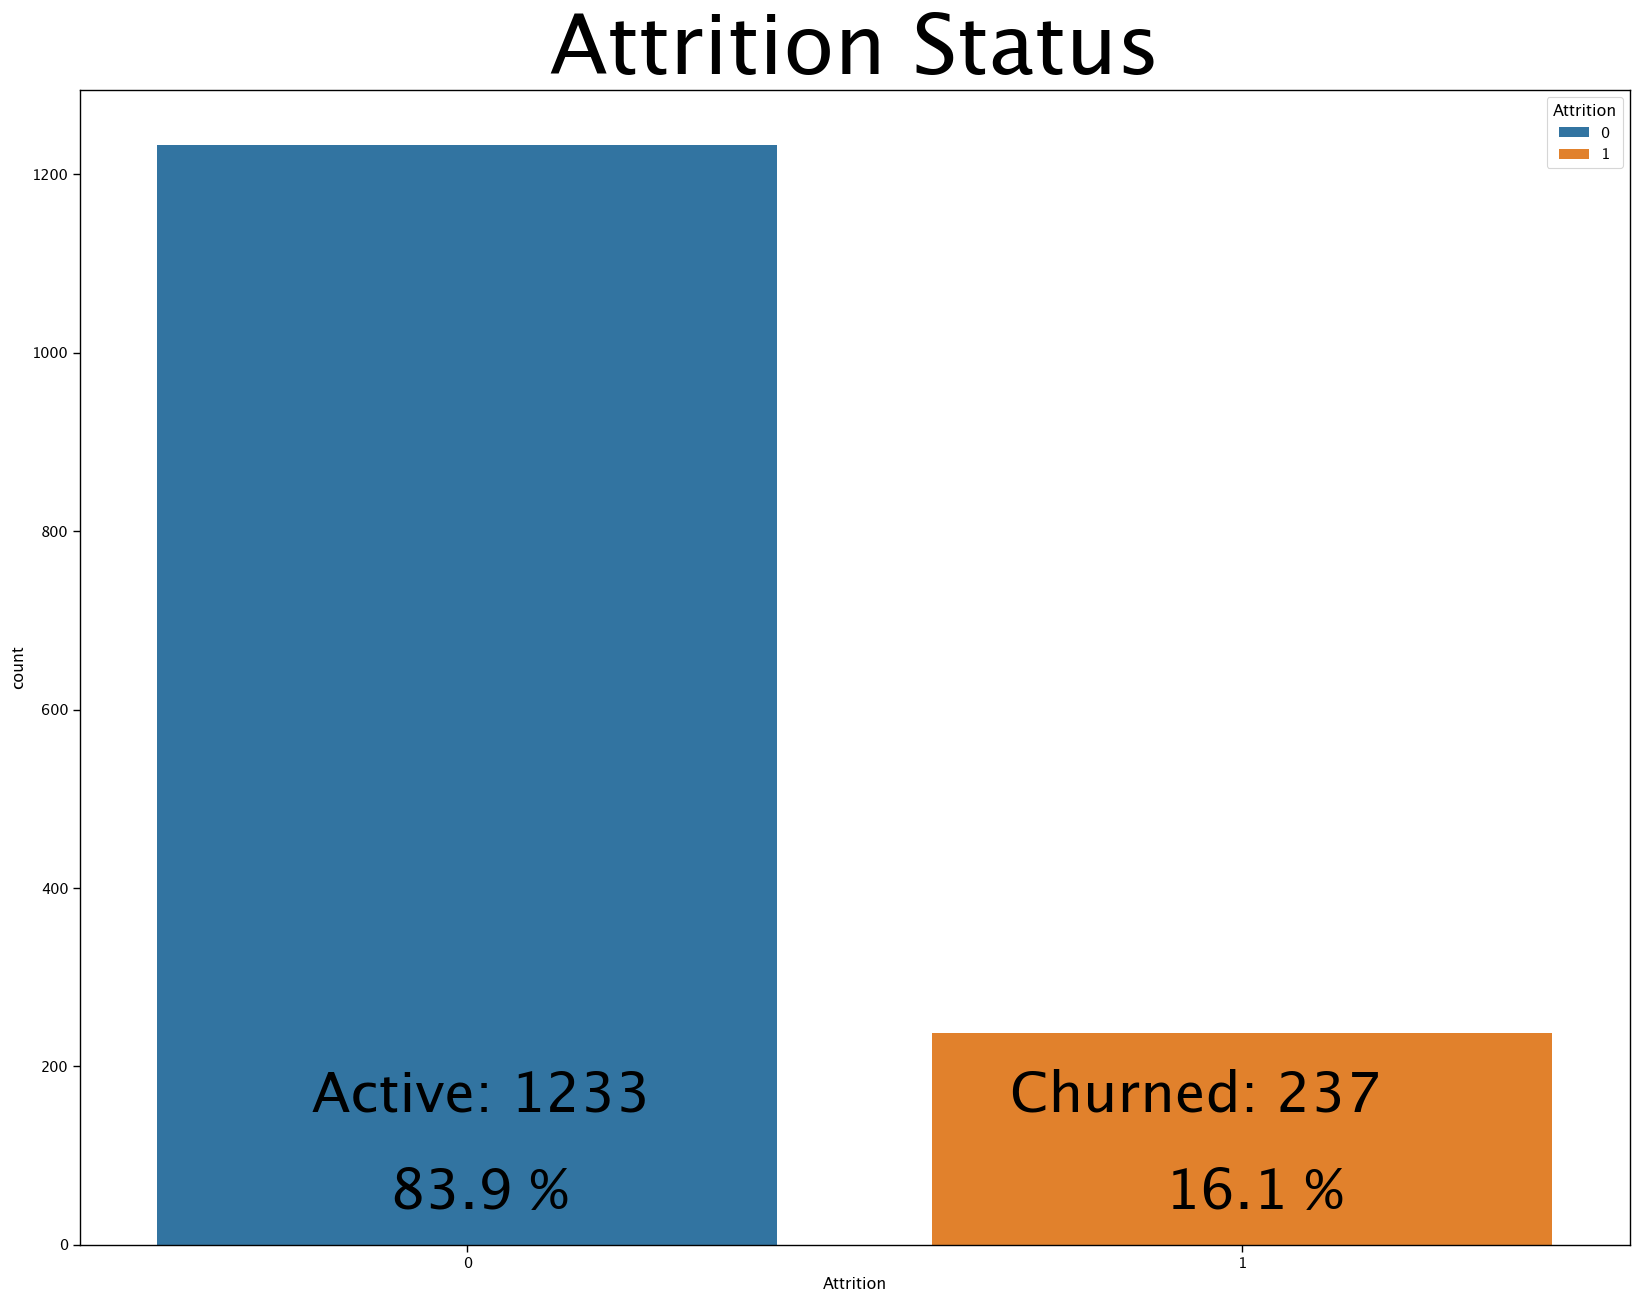

In [19]:
# Exploratory Data Analysis
target = df.Attrition

churned = target.sum()
active = len(target) - churned

Percentage_churned = round((churned / len(target)) * 100, 1)
Percentage_active = round((active / len(target)) * 100, 1)

# Distribution of target variable
plt.figure(figsize=(20, 15))
sns.set_context('paper', font_scale=1.2)
sns.countplot(x='Attrition', data=df, palette=['#1F77B4', '#FF7F0E'], hue = 'Attrition')
plt.annotate('Active: {}'.format(active), xy=(-0.3, 150), xytext=(-0.2, 150), size=40)
plt.annotate('Churned: {}'.format(churned), xy=(0.7, 150), xytext=(0.7, 150), size=40)
plt.annotate(str(Percentage_active) + " %", xy=(-0.3, 15), xytext=(-0.1, 40), size=40)
plt.annotate(str(Percentage_churned) + " %", xy=(0.7, 15), xytext=(0.9, 40), size=40)
plt.title('Attrition Status', size=60)
image_file = 'figure 1.1.png'
save_path = f'{image_file}'
plt.savefig(save_path)

del [active, churned, Percentage_active, Percentage_churned, target]


### Plot of the categorical Variables Part 1


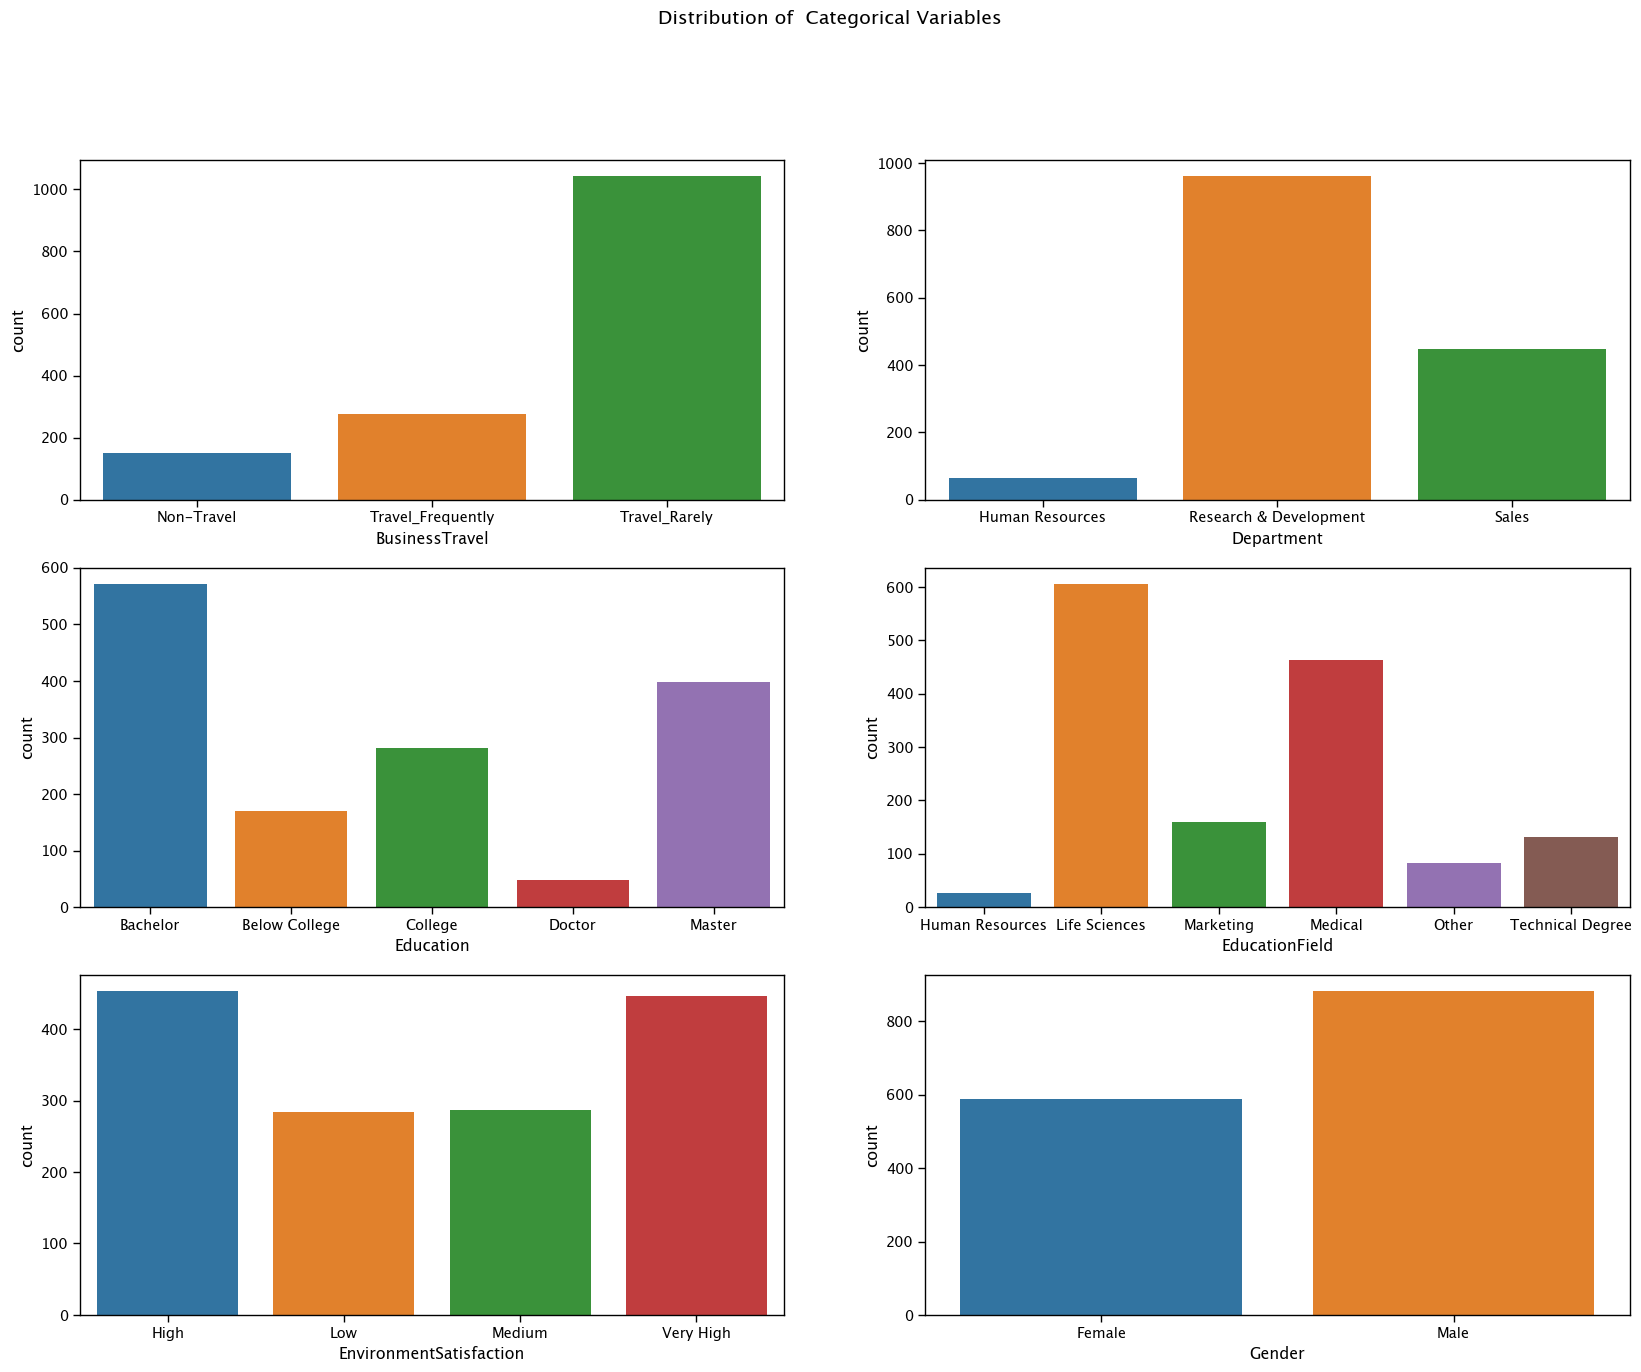

In [20]:
fig, axes = plt.subplots(3, 2, figsize=(20, 15), facecolor='white')
fig.suptitle('Distribution of  Categorical Variables')

ax = sns.countplot(x="BusinessTravel", data=df, palette=['#1F77B4', '#FF7F0E', '#2CA02C'],hue="BusinessTravel", ax=axes[0, 0])
ax1 = sns.countplot(x="Department", data=df, palette=['#1F77B4', '#FF7F0E', '#2CA02C'],hue="Department", ax=axes[0, 1])
ax2 = sns.countplot(x="Education", data=df, palette=['#1F77B4', '#FF7F0E', '#2CA02C', '#D62728', '#9467BD'],hue="Education", ax=axes[1, 0])
ax3 = sns.countplot(x="EducationField", data=df, palette=['#1F77B4', '#FF7F0E', '#2CA02C', '#D62728', '#9467BD', '#8C564B'],hue="EducationField", ax=axes[1, 1])
ax4 = sns.countplot(x="EnvironmentSatisfaction", data=df, palette=['#1F77B4', '#FF7F0E', '#2CA02C', '#D62728'],hue="EnvironmentSatisfaction", ax=axes[2, 0])
ax5 = sns.countplot(x="Gender", data=df, palette=['#1F77B4', '#FF7F0E'],hue="Gender", ax=axes[2, 1])
image_file = 'figure 1.2.png'
save_path = f'{image_file}'
plt.savefig(save_path)

# %%


### Plot of the categorical Variables Part 2

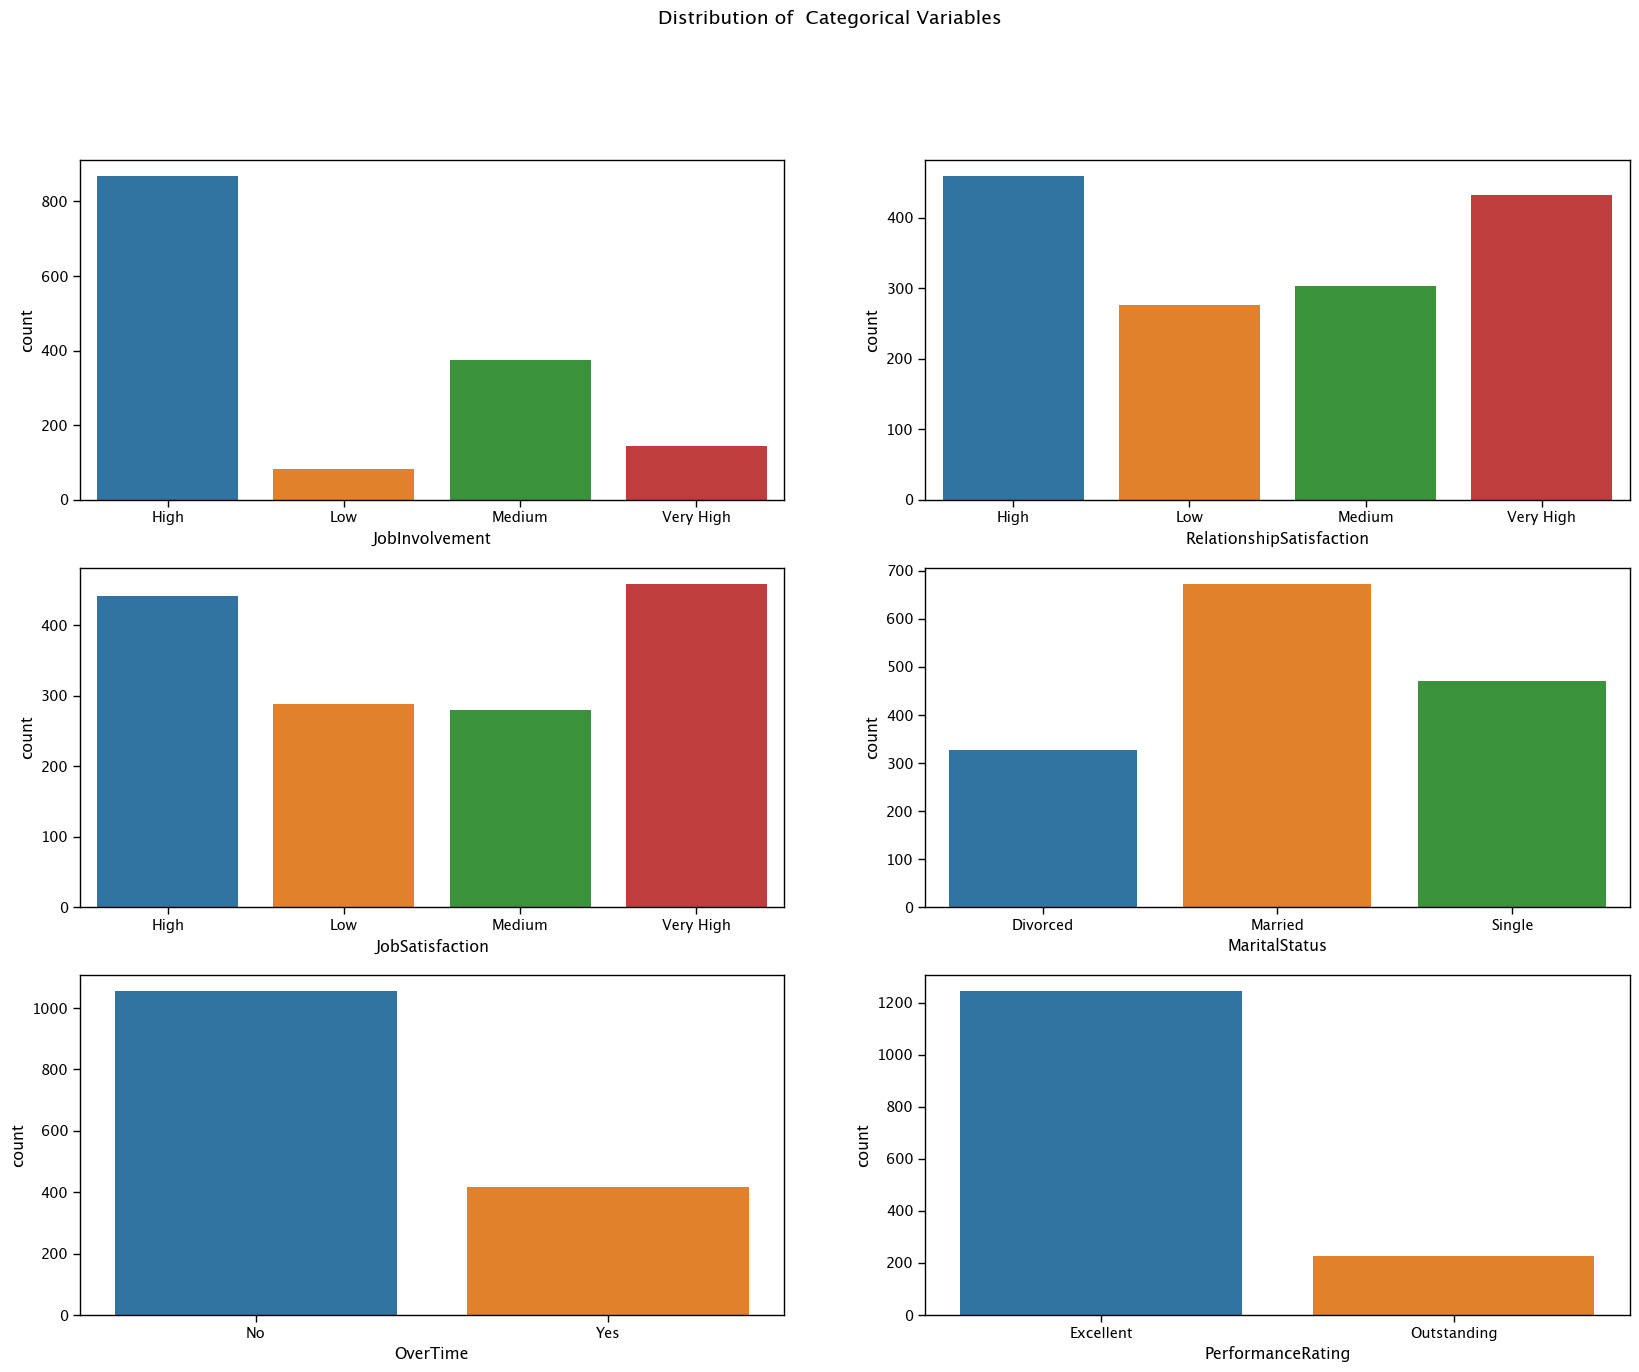

In [21]:
fig, axes = plt.subplots(3, 2, figsize=(20, 15), facecolor='white')
fig.suptitle('Distribution of  Categorical Variables')

ax = sns.countplot(x="JobInvolvement", data=df, palette=['#1F77B4', '#FF7F0E', '#2CA02C', '#D62728'],hue = "JobInvolvement", ax=axes[0, 0])
ax1 = sns.countplot(x="RelationshipSatisfaction", data=df, palette=['#1F77B4', '#FF7F0E', '#2CA02C', '#D62728'],hue = "RelationshipSatisfaction", ax=axes[0, 1])
ax2 = sns.countplot(x="JobSatisfaction", data=df, palette=['#1F77B4', '#FF7F0E', '#2CA02C', '#D62728'],hue = "JobSatisfaction", ax=axes[1, 0])
ax3 = sns.countplot(x="MaritalStatus", data=df, palette=['#1F77B4', '#FF7F0E', '#2CA02C'],hue = "MaritalStatus", ax=axes[1, 1])
ax4 = sns.countplot(x="OverTime", data=df, palette=['#1F77B4', '#FF7F0E'],hue = "OverTime", ax=axes[2, 0])
ax5 = sns.countplot(x="PerformanceRating", data=df, palette=['#1F77B4', '#FF7F0E'],hue = "PerformanceRating", ax=axes[2, 1])
image_file = 'figure 1.3.png'
save_path = f'{image_file}'
plt.savefig(save_path)

### Plot of the categorical Variables Part 3


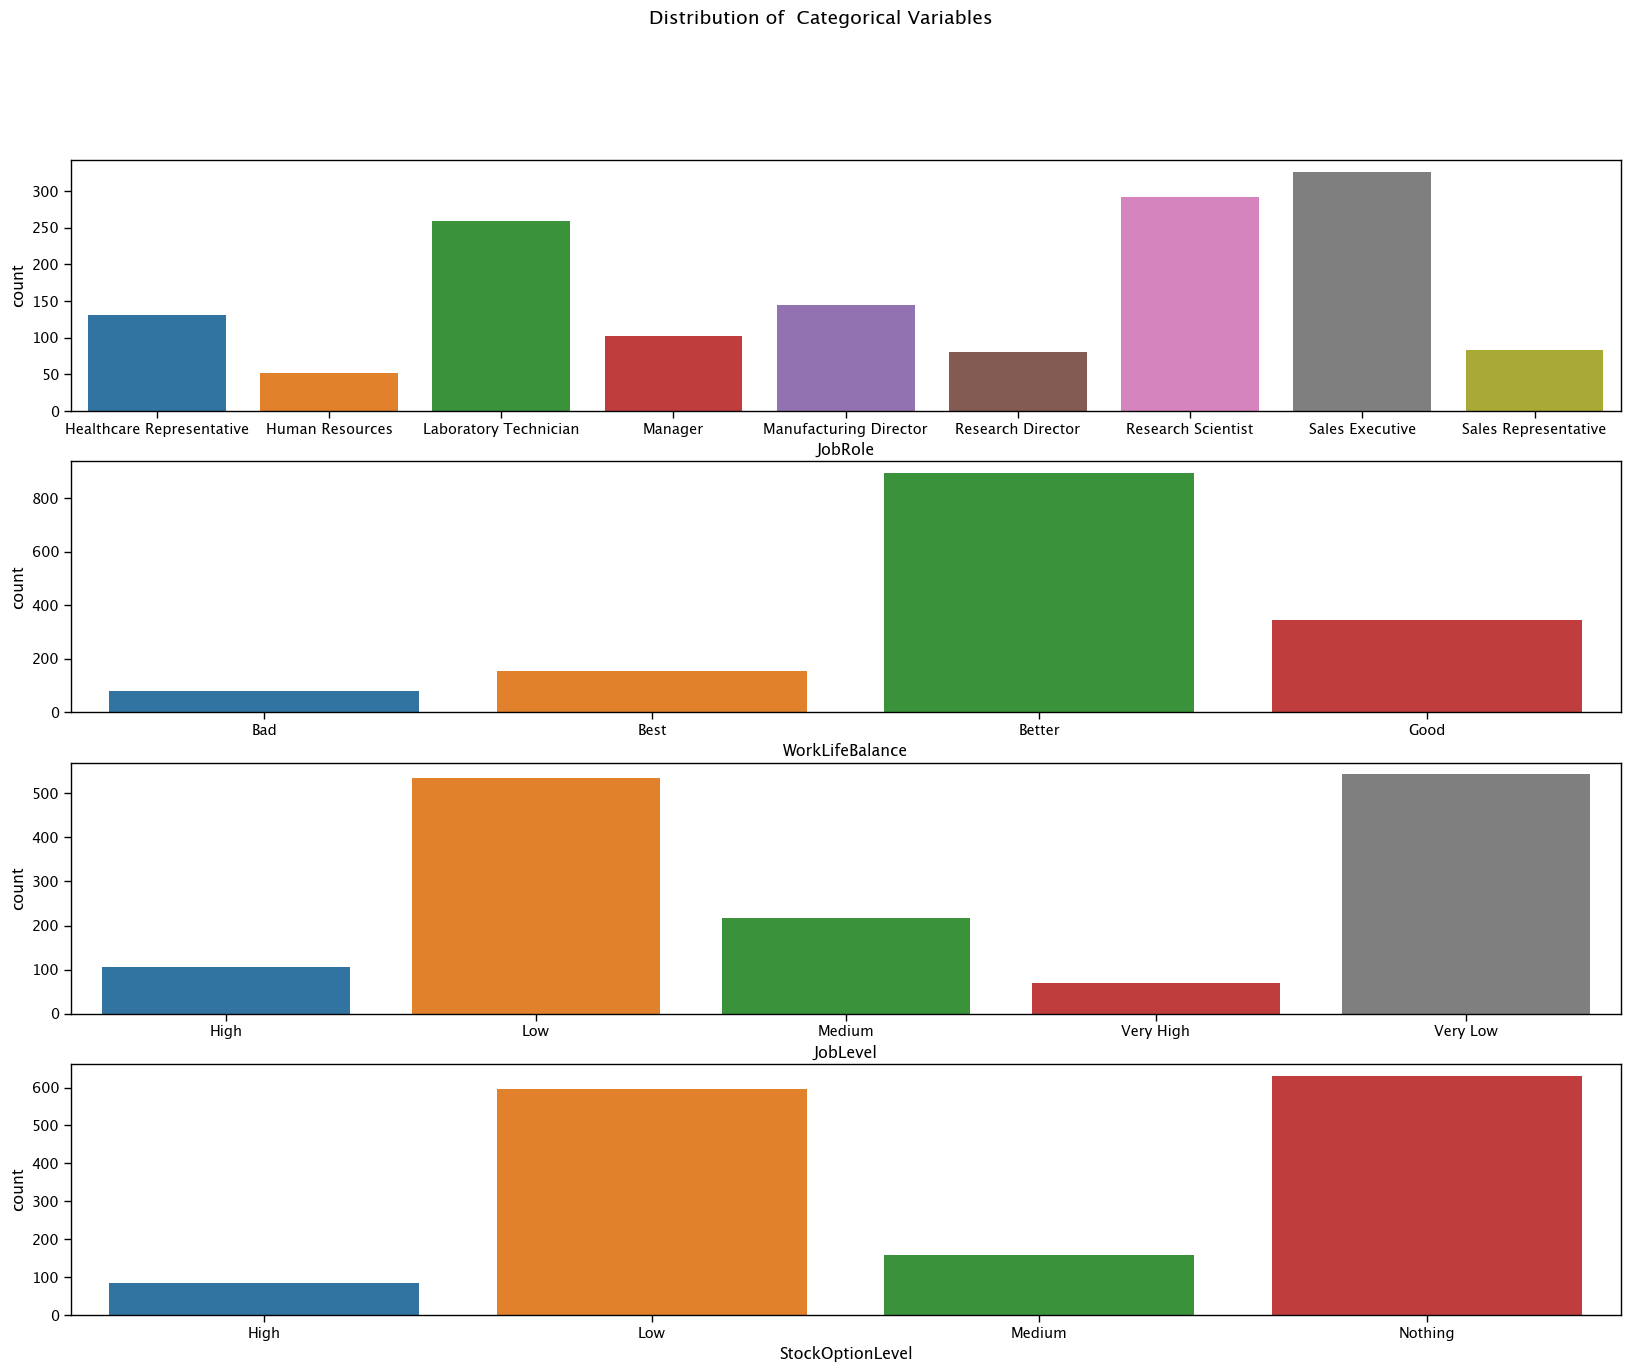

In [22]:
fig, axes = plt.subplots(4, figsize=(20, 15), facecolor='white')
fig.suptitle('Distribution of  Categorical Variables')

ax = sns.countplot(x="JobRole", data=df, palette=['#1F77B4', '#FF7F0E', '#2CA02C', '#D62728', '#9467BD', '#8C564B', '#E377C2', '#7F7F7F', '#BCBD22'],hue = "JobRole", ax=axes[0])
ax1 = sns.countplot(x="WorkLifeBalance", data=df, palette=['#1F77B4', '#FF7F0E', '#2CA02C', '#D62728'],hue = "WorkLifeBalance", ax=axes[1])
ax2 = sns.countplot(x="JobLevel", data=df, palette=['#1F77B4', '#FF7F0E', '#2CA02C', '#D62728','#7F7F7F'],hue = "JobLevel", ax=axes[2])
ax3 = sns.countplot(x="StockOptionLevel", data=df, palette=['#1F77B4', '#FF7F0E', '#2CA02C', '#D62728'],hue = "StockOptionLevel", ax=axes[3])

image_file = 'figure 1.4.png'
save_path = f'{image_file}'
plt.savefig(save_path)

### Plot of the numerical variables


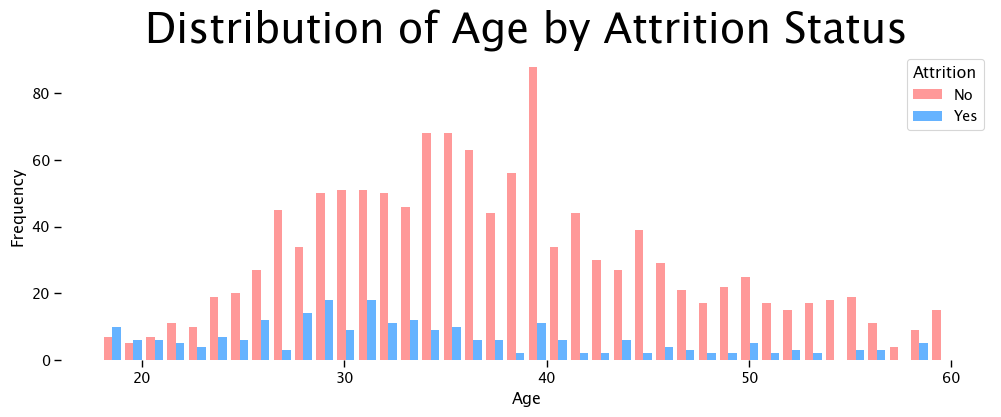

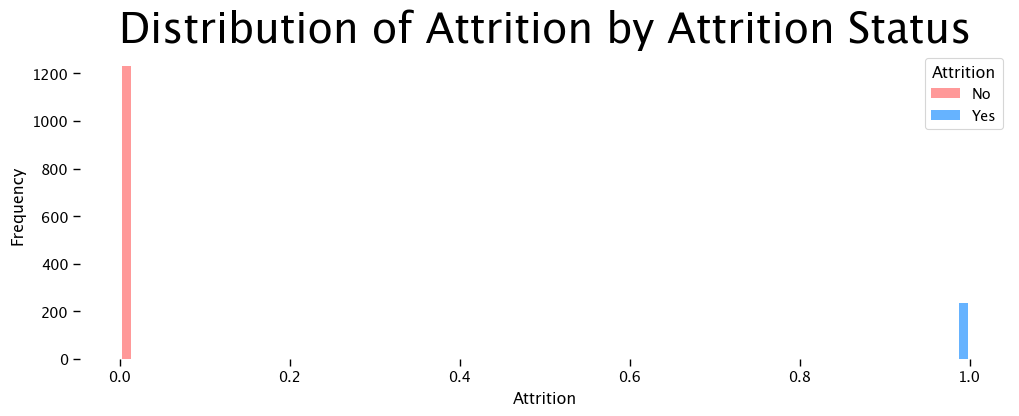

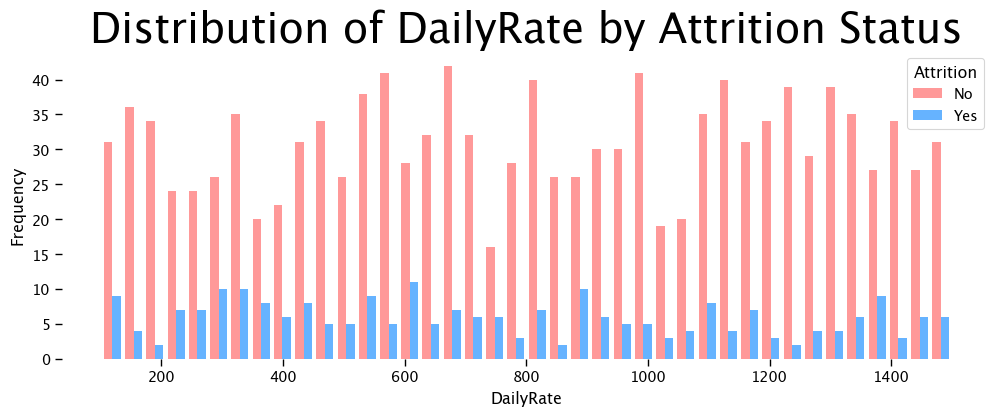

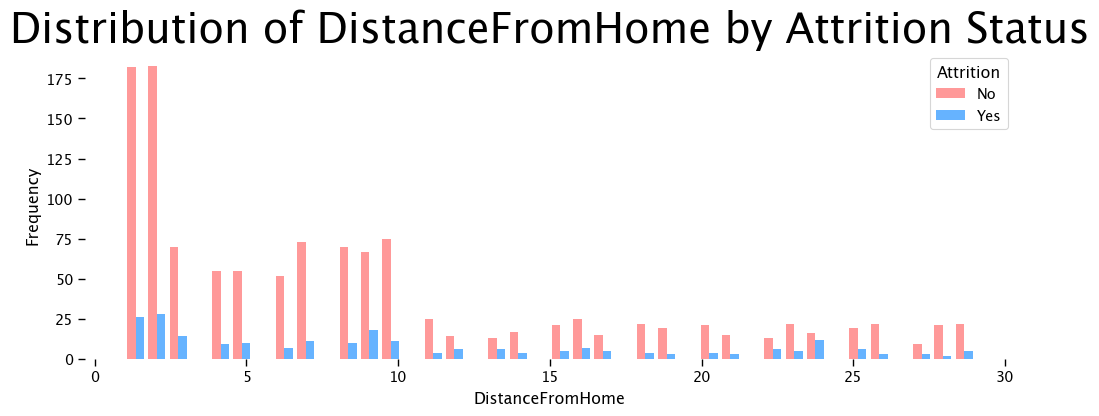

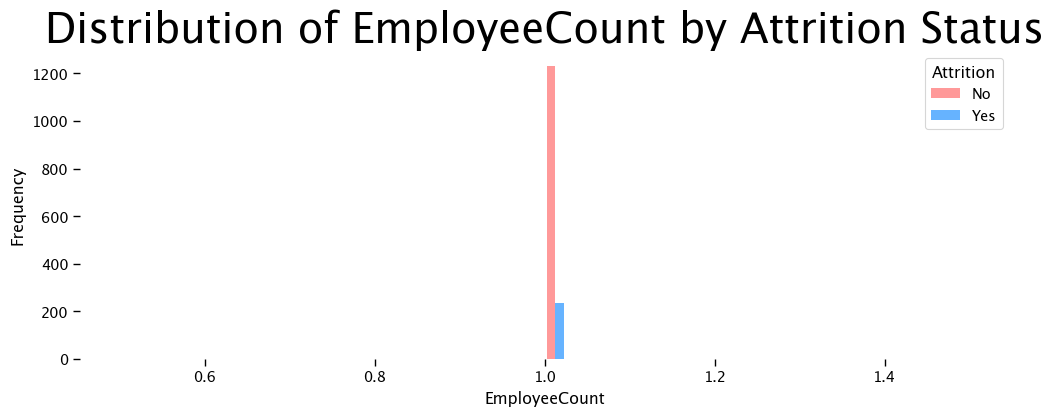

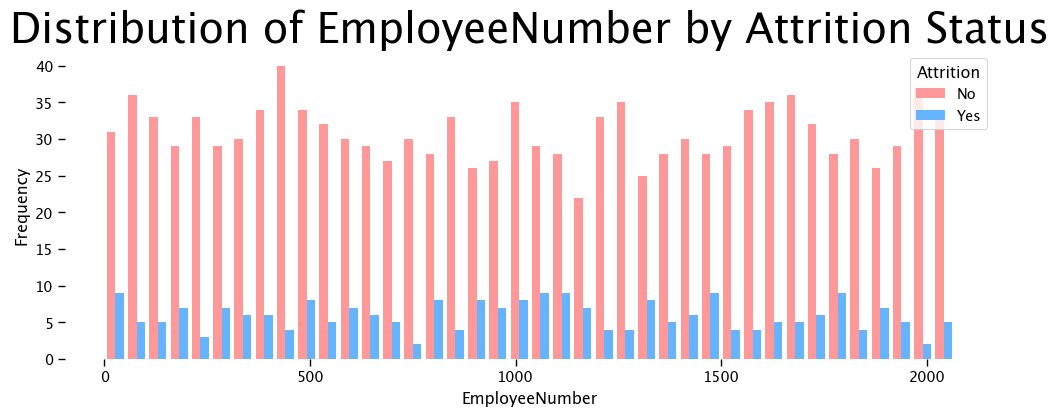

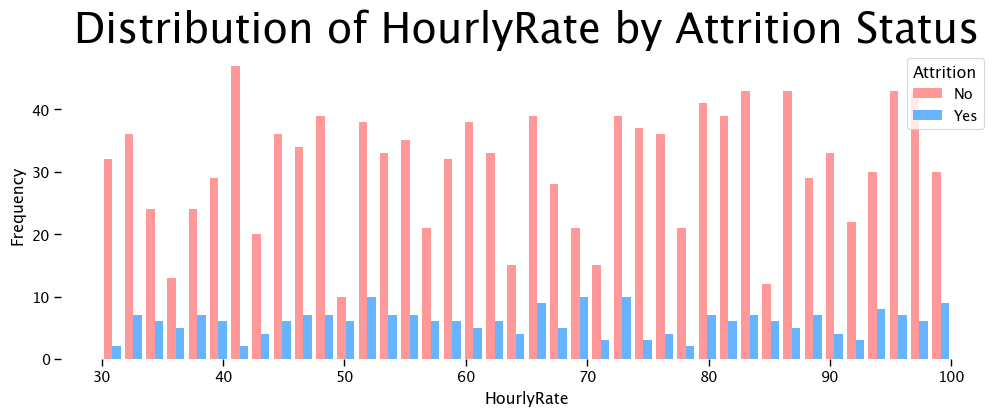

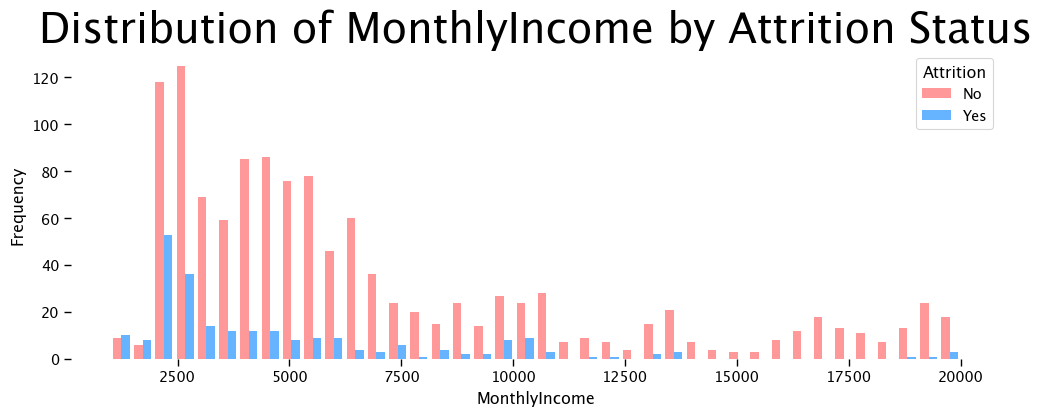

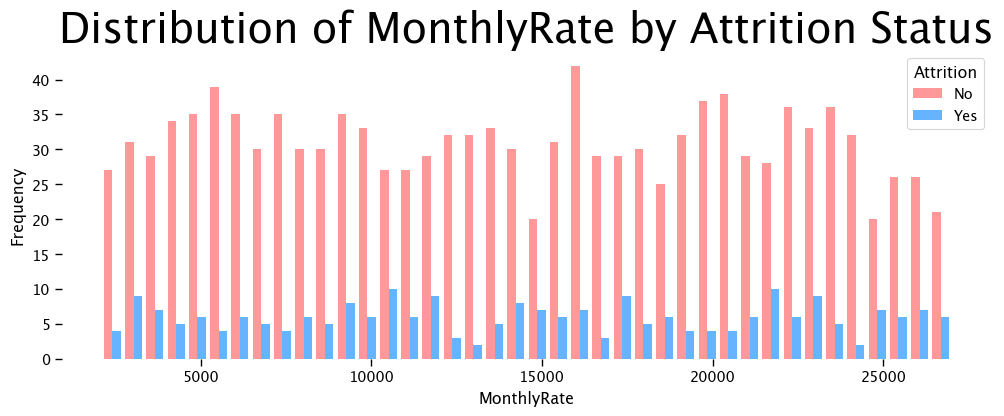

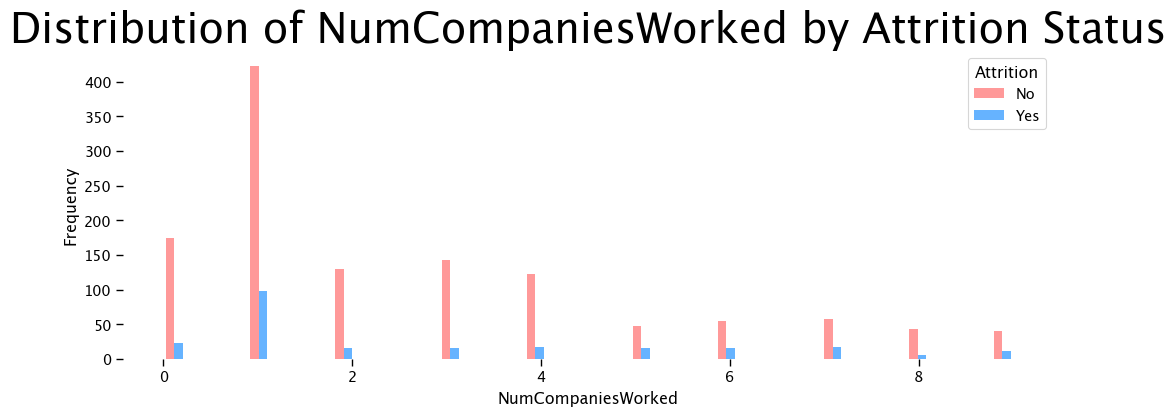

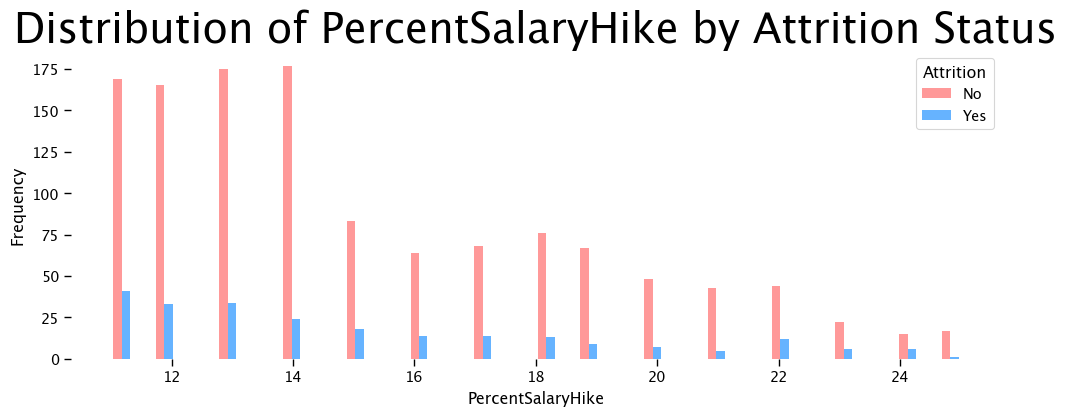

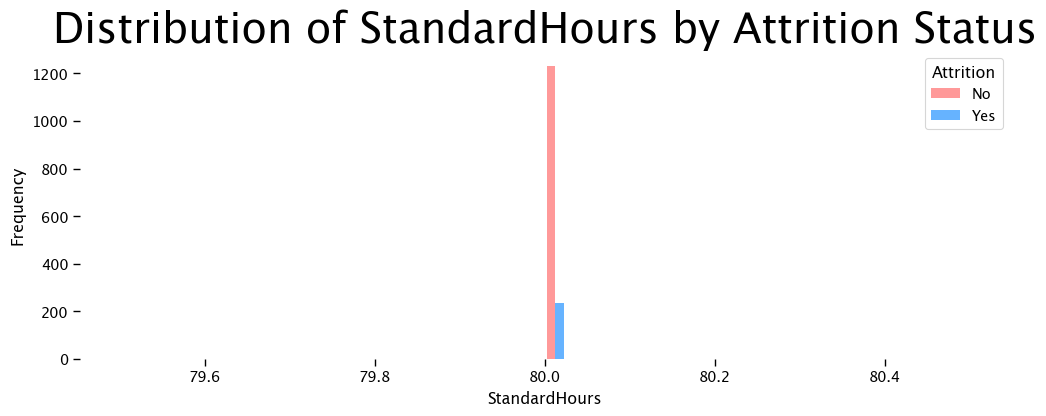

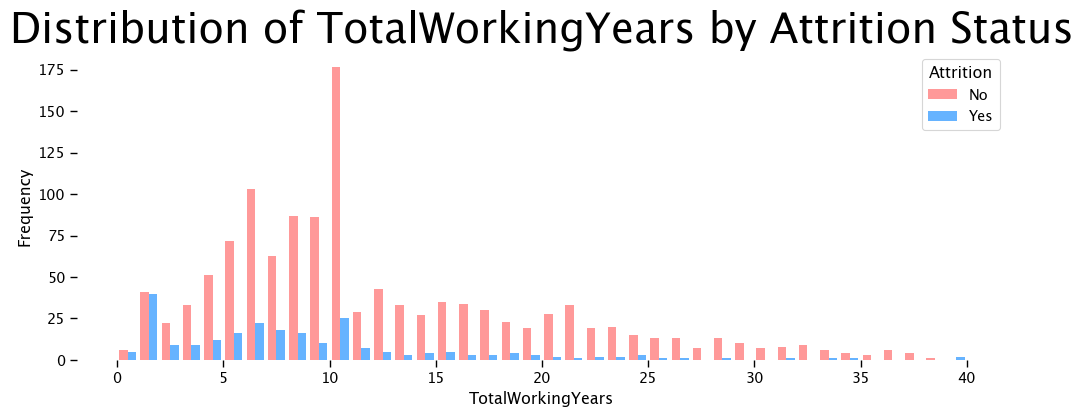

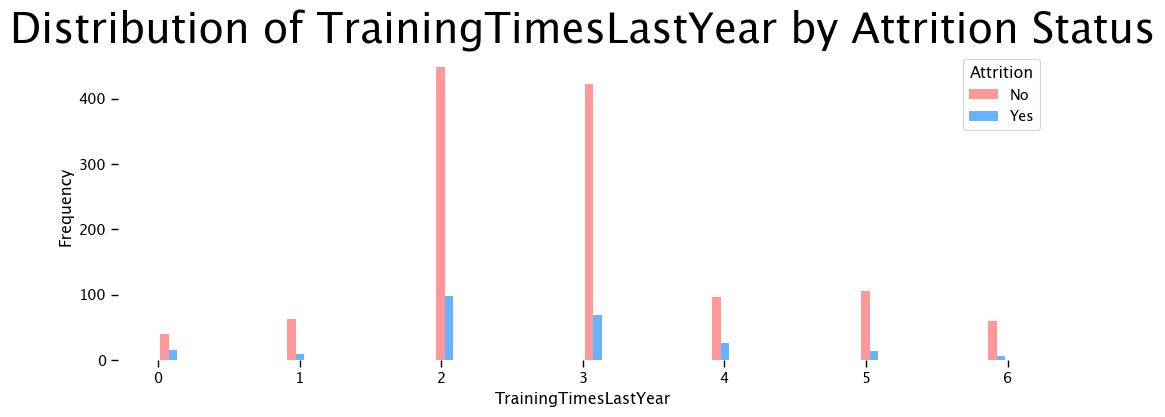

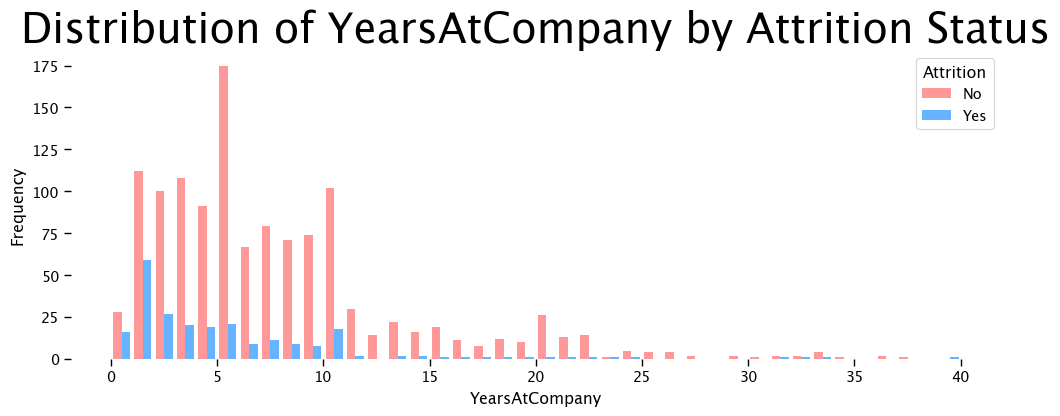

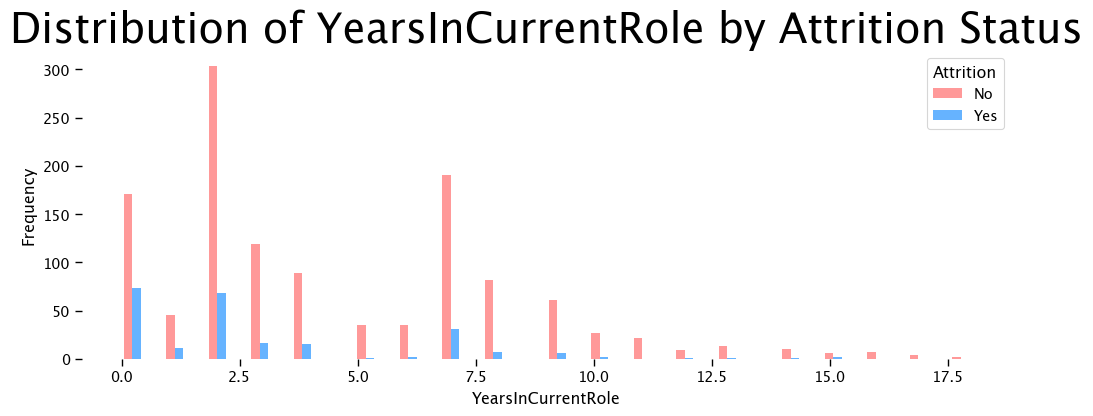

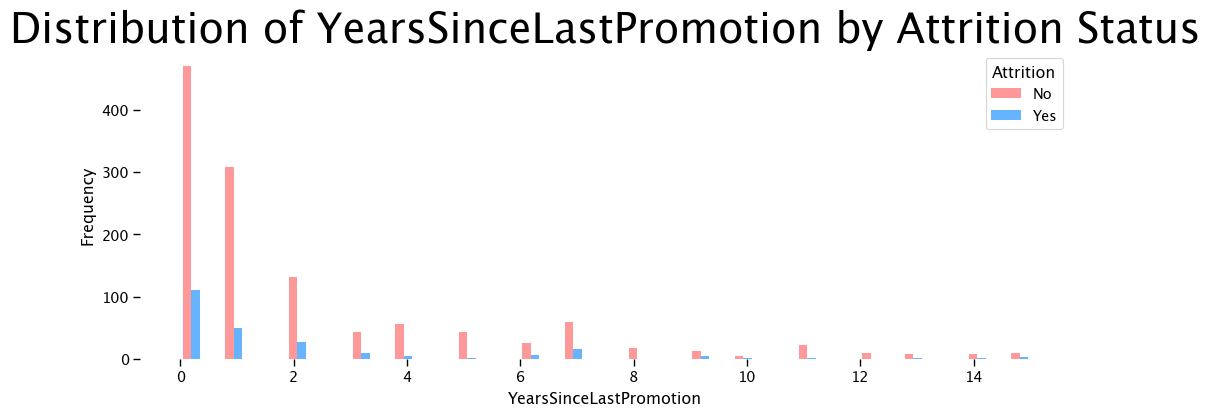

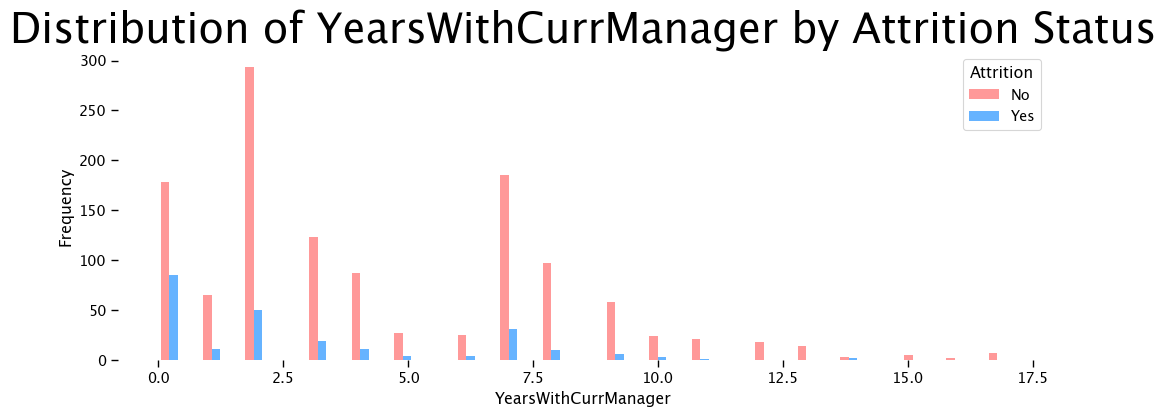

In [23]:
for i in numerical_variables:
  plot_continuous_variables(df, 'Attrition', i, 0, 1, f'figure 1.{numerical_variables.index(i)+5}.png')

### Correlation Matrix of the numerical variables to detect early signs of collinearity 

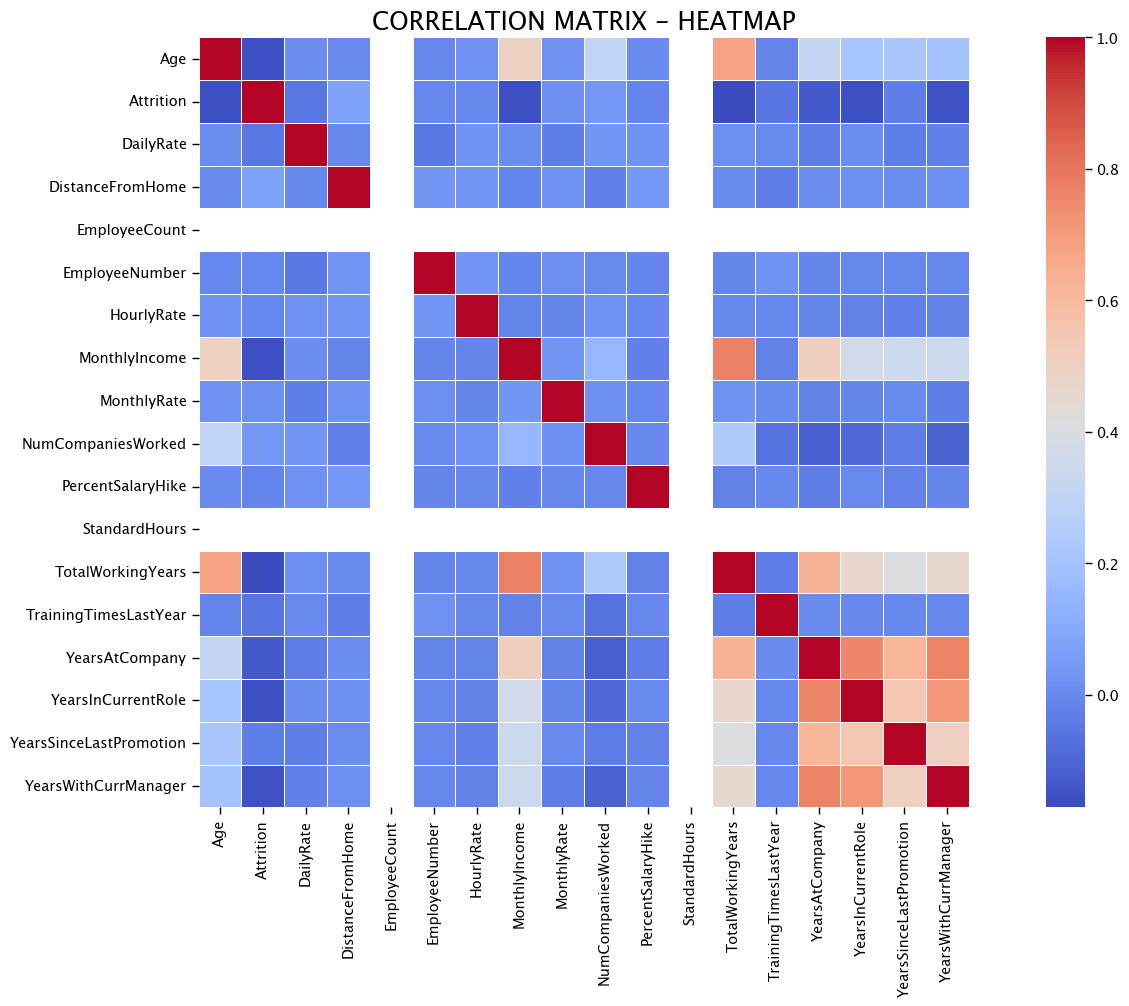

In [24]:
correlation_matrix(df, 'figure 2.0.png')

### Drop Variables

We drop the following variables: 
1. Employee count: Constant
2. Standard Hours : Constant
3. Employee number : Unique employee identifer and not a predictor 

In [25]:
# %% Drop All Potential Colinear variables
# Ideal work around: Use the variables to derive a single representative.
# Average would be ideal for most of the transaction statistics
df.drop(["EmployeeCount", "StandardHours", "EmployeeNumber"], axis=1, inplace=True)


### Sanity check on previous operation

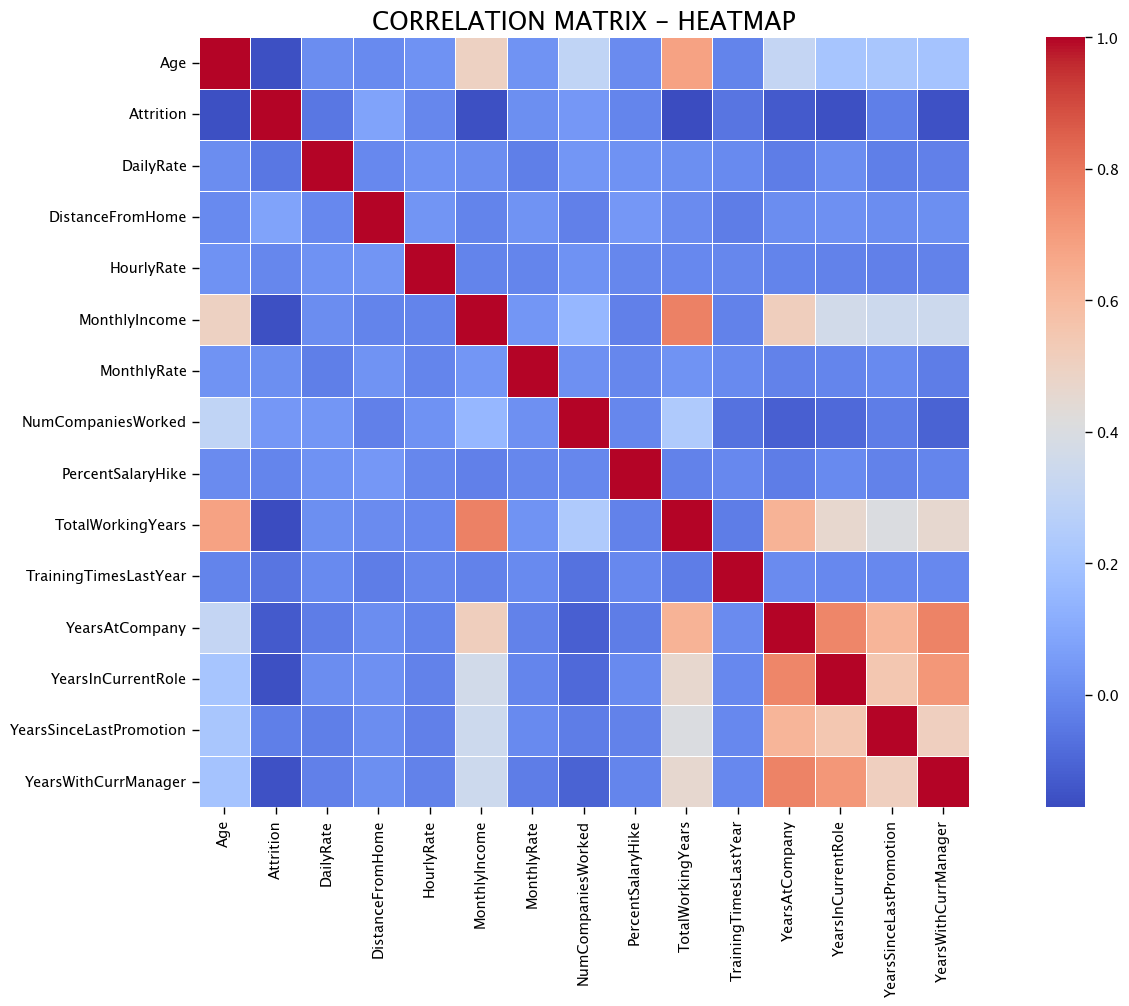

In [26]:
correlation_matrix(df, 'figure 2.1.png')

## Hypothesis Testing

### Categorical Variables: Chi-sqared test of independence

The purpose of this statistical test is to fine out if there is a relationship between the categorical variables and the response variable. 


In [27]:
for col in categorical_variables:
    cross = pd.crosstab(df[col], df['Attrition'])
    

    # Crosstab
    print("=======================================")
    print(cross)

    cross = np.array(cross)

    chi2_stat, p_val, dof, ex = stats.chi2_contingency(cross)

    print('=== Chi2 Statistic===')
    print(chi2_stat)
    print('\n')

    print('=== Degree of Freedom===')
    print(dof)
    print('\n')

    print('===P-value===')
    print(p_val)
    print('\n')

    print('=== Contigency Table===')
    print(ex)

    print("=======================================")
del [chi2_stat, p_val, dof, ex, cross, col]

Attrition            0    1
BusinessTravel             
Non-Travel         138   12
Travel_Frequently  208   69
Travel_Rarely      887  156
=== Chi2 Statistic===
24.182413685655174


=== Degree of Freedom===
2


===P-value===
5.608614476449931e-06


=== Contigency Table===
[[125.81632653  24.18367347]
 [232.34081633  44.65918367]
 [874.84285714 168.15714286]]
Attrition                 0    1
Department                      
Human Resources          51   12
Research & Development  828  133
Sales                   354   92
=== Chi2 Statistic===
10.79600732241067


=== Degree of Freedom===
2


===P-value===
0.004525606574479633


=== Contigency Table===
[[ 52.84285714  10.15714286]
 [806.06326531 154.93673469]
 [374.09387755  71.90612245]]
Attrition        0   1
Education             
Bachelor       473  99
Below College  139  31
College        238  44
Doctor          43   5
Master         340  58
=== Chi2 Statistic===
3.0739613982367193


=== Degree of Freedom===
4


===P-value===
0.5455

In [28]:
# List of categorical variables
categorical_variables = list(df.select_dtypes(include=['category']).columns)

# List of numerical variables
numerical_variables = df.select_dtypes(include=["int64"]).columns.tolist()


### Numerical Variables: t-test of independence

The purpose of this statistical test is to fine out if there is a relationship between the numerical variables and the response variable. 

In [29]:
for i in numerical_variables :
    x1 = list(df[df['Attrition'] == 0][i])
    x2 = list(df[df['Attrition'] == 1][i])

    t_statistic, p_value = ttest_ind(x1, x2)
    print("==================================")
    print('===Test Results for ' + i + ' ====')
    print('Test Statistics: {:.3f}'.format(t_statistic))
    print('P_value: {:.3f}'.format(p_value))
    print("==================================")
del [x1, x2, i, t_statistic, p_value]

===Test Results for Age ====
Test Statistics: 6.179
P_value: 0.000
===Test Results for Attrition ====
Test Statistics: -inf
P_value: 0.000
===Test Results for DailyRate ====
Test Statistics: 2.174
P_value: 0.030
===Test Results for DistanceFromHome ====
Test Statistics: -2.995
P_value: 0.003
===Test Results for HourlyRate ====
Test Statistics: 0.262
P_value: 0.793
===Test Results for MonthlyIncome ====
Test Statistics: 6.204
P_value: 0.000
===Test Results for MonthlyRate ====
Test Statistics: -0.581
P_value: 0.561
===Test Results for NumCompaniesWorked ====
Test Statistics: -1.668
P_value: 0.096
===Test Results for PercentSalaryHike ====
Test Statistics: 0.516
P_value: 0.606
===Test Results for TotalWorkingYears ====
Test Statistics: 6.652
P_value: 0.000
===Test Results for TrainingTimesLastYear ====
Test Statistics: 2.283
P_value: 0.023
===Test Results for YearsAtCompany ====
Test Statistics: 5.196
P_value: 0.000
===Test Results for YearsInCurrentRole ====
Test Statistics: 6.232
P_val

Transform the categorical variables to make it easy for modeling by encoding them as instance of 1 or 0
for presence or absense of a response respectively. 

In [30]:
df = pd.get_dummies(df, columns=categorical_variables, drop_first=True)


### Split the data into Training and Test Data set --- 70: 30

We use a stratified sampling to ensure we have an equal proportion of churn employees in the trains data as in the test data. 

In [31]:
features = df.drop('Attrition', axis = 1, inplace = False)
target = df['Attrition']

X_train, X_test, y_train, y_test = train_test_split(features, target, stratify = target,test_size = .3, random_state = 44)

### Boosting
This is to ensure the distribution of churn and active events in the training dataset is equaly distributed. 
This is needed to train other instances of the model. 

In [32]:


sm = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = sm.fit_resample(X_train, y_train)

# Now X_train_res and y_train_res are balanced


# Model Training

## Champion Challenger Approach to Model Selection. 
Selection Criteria is the following order: 
1. Recall: It's costly for an employee to leave than to spend on them to keep them. 
2. Accuracy

### Vanilla Logistic Regression Model

Plug the values in the model without tuning any of the parameters. 

In [33]:
logreg_vanilla = LogisticRegression(max_iter = 1000, solver= 'liblinear')

In [34]:
_ ,y_pred = evaluate_model(logreg_vanilla, X_train, y_train, X_test, y_test,save_path='figure 3.0.png', model_name="Vanilla Logistic Regression Model")

Metrics image saved to figure 3.0.png


In [35]:
evaluate_model_with_cv(model=logreg_vanilla,
    X_train=X_train,
    y_train=y_train,
    y_test=y_test,
    y_pred=y_pred,
    target_names=['Stayed', 'Churned'],
    image_file='figure 3.1.png', chart_name= "Logistic Regression Vanilla")


plot_confusion_matrix(
    y_test,
    y_pred,
    #labels=['Stayed', 'Churned'],
    title="Confusion Matrix - Logistic Regression Vanilla",
    image_file='figure 3.2.png'
)


plot_top_features(logreg_vanilla, feature_names=features.columns, model_type='logistic',save_path='figure 3.3.png')

Classification report saved to figure 3.1.png
Confusion matrix saved to: figure 3.2.png
Saved top 10 feature plot to figure 3.3.png


In [36]:
param_grid = param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100, 1000, 1e4],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000],
    'tol': [1e-4, 1e-3, 1e-2],
    'class_weight': [None, 'balanced']
}

# Instantiate a logistic regression classifier
logreg = LogisticRegression()

# Instantiate the GRIDSEARCH object
logreg_cv = RandomizedSearchCV(logreg,param_grid , cv=5, n_iter= 200, random_state=43, n_jobs= -1)

# Fit it to the data
logreg_cv.fit(X_train, y_train)

# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_))
print('Best cross-validation score: {:.2f}'.format(logreg_cv.best_score_))

results = pd.DataFrame(logreg_cv.cv_results_)
file_name = 'Hyperparameter Search for Logistic Regression with Original Data.csv'
display(results.head())
results.to_csv(f'{file_name}', index = False)


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

Tuned Logistic Regression Parameters: {'tol': 0.01, 'solver': 'liblinear', 'penalty': 'l1', 'max_iter': 600, 'class_weight': None, 'C': 1}
Best cross-validation score: 0.88


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_tol,param_solver,param_penalty,param_max_iter,param_class_weight,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.339916,0.037689,0.004161,0.002179,0.0001,newton-cg,l2,500,balanced,1000.0000,"{'tol': 0.0001, 'solver': 'newton-cg', 'penalt...",0.766990,0.776699,0.747573,0.752427,0.765854,0.761909,0.010541,30
1,0.001590,0.000951,0.000000,0.000000,0.0100,lbfgs,l1,400,balanced,0.0001,"{'tol': 0.01, 'solver': 'lbfgs', 'penalty': 'l...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,62
2,0.002028,0.000814,0.000000,0.000000,0.0100,lbfgs,l1,100,balanced,0.0001,"{'tol': 0.01, 'solver': 'lbfgs', 'penalty': 'l...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,62
3,0.073092,0.008178,0.001577,0.000561,0.0001,lbfgs,l2,400,balanced,0.0010,"{'tol': 0.0001, 'solver': 'lbfgs', 'penalty': ...",0.635922,0.679612,0.635922,0.650485,0.673171,0.655022,0.018353,41
4,0.006947,0.002775,0.003141,0.002508,0.0010,liblinear,l2,200,None,0.0001,"{'tol': 0.001, 'solver': 'liblinear', 'penalty...",0.839806,0.839806,0.839806,0.834951,0.839024,0.838679,0.001888,11


In [38]:
logreg_tuned = LogisticRegression(**logreg_cv.best_params_)
_ ,y_pred = evaluate_model(logreg_tuned, X_train, y_train, X_test, y_test,save_path='figure 4.0.png', model_name="Tuned Logistic Regression Model")

Metrics image saved to figure 4.0.png


In [39]:
evaluate_model_with_cv(model=logreg_tuned,
    X_train=X_train,
    y_train=y_train,
    y_test=y_test,
    y_pred=y_pred,
    target_names=['Stayed', 'Churned'],
    image_file='figure 4.1.png', chart_name= "Logistic Regression Vanilla")


plot_confusion_matrix(
    y_test,
    y_pred,
    #labels=['Stayed', 'Churned'],
    title="Confusion Matrix - Logistic Regression Vanilla",
    image_file='figure 4.2.png'
)


plot_top_features(logreg_tuned, feature_names=features.columns, model_type='logistic',save_path='figure 4.3.png')

Classification report saved to figure 4.1.png
Confusion matrix saved to: figure 4.2.png
Saved top 10 feature plot to figure 4.3.png


In [40]:
logreg_balanced = LogisticRegression(max_iter = 1000,  solver= 'liblinear')

In [42]:
_ ,y_pred = evaluate_model(logreg_balanced, X_train_balanced, y_train_balanced, X_test, y_test,save_path='figure 5.0.png', model_name="Vanilla Logistic Regression Model - Balanced Data")

evaluate_model_with_cv(model=logreg_balanced,
    X_train=X_train_balanced,
    y_train=y_train_balanced,
    y_test=y_test,
    y_pred=y_pred,
    target_names=['Stayed', 'Churned'],
    image_file='figure 5.1.png', chart_name= "Logistic Regression Vanilla")


plot_confusion_matrix(
    y_test,
    y_pred,
    #labels=['Stayed', 'Churned'],
    title="Confusion Matrix - Logistic Regression Vanilla",
    image_file='figure 5.2.png'
)


plot_top_features(logreg_balanced, feature_names=features.columns, model_type='logistic',save_path='figure 5.3.png')

Metrics image saved to figure 5.0.png
Classification report saved to figure 5.1.png
Confusion matrix saved to: figure 5.2.png
Saved top 10 feature plot to figure 5.3.png


In [43]:
param_grid = param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100, 1000, 1e4],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000],
    'tol': [1e-4, 1e-3, 1e-2],
    'class_weight': [None, 'balanced']
}

# Instantiate a logistic regression classifier
logreg = LogisticRegression()

# Instantiate the GRIDSEARCH object
logreg_cv = RandomizedSearchCV(logreg,param_grid , cv=5, n_iter= 200, random_state=43, n_jobs= -1)

# Fit it to the data
logreg_cv.fit(X_train_balanced, y_train_balanced)

# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_))
print('Best cross-validation score: {:.2f}'.format(logreg_cv.best_score_))

results = pd.DataFrame(logreg_cv.cv_results_)
file_name = 'Hyperparameter Search for Logistic Regression with Balanced Data.csv'
display(results.head())
results.to_csv(f'{file_name}', index = False)


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

Tuned Logistic Regression Parameters: {'tol': 0.0001, 'solver': 'newton-cg', 'penalty': 'l2', 'max_iter': 100, 'class_weight': 'balanced', 'C': 10}
Best cross-validation score: 0.86


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_tol,param_solver,param_penalty,param_max_iter,param_class_weight,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.260038,0.034833,0.003371,0.001446,0.0001,newton-cg,l2,500,balanced,1000.0000,"{'tol': 0.0001, 'solver': 'newton-cg', 'penalt...",0.526012,0.953623,0.942029,0.936232,0.965217,0.864623,0.169598,2
1,0.003942,0.001414,0.000000,0.000000,0.0100,lbfgs,l1,400,balanced,0.0001,"{'tol': 0.01, 'solver': 'lbfgs', 'penalty': 'l...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,62
2,0.003281,0.001159,0.000000,0.000000,0.0100,lbfgs,l1,100,balanced,0.0001,"{'tol': 0.01, 'solver': 'lbfgs', 'penalty': 'l...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,62
3,0.087415,0.013635,0.004557,0.002915,0.0001,lbfgs,l2,400,balanced,0.0010,"{'tol': 0.0001, 'solver': 'lbfgs', 'penalty': ...",0.667630,0.762319,0.721739,0.704348,0.747826,0.720772,0.033325,30
4,0.013946,0.003540,0.002929,0.001332,0.0010,liblinear,l2,200,None,0.0001,"{'tol': 0.001, 'solver': 'liblinear', 'penalty...",0.615607,0.686957,0.646377,0.660870,0.628986,0.647759,0.024886,36


In [45]:
logreg_balanced_tuned = LogisticRegression(**logreg_cv.best_params_)

_ ,y_pred = evaluate_model(logreg_balanced_tuned, X_train, y_train, X_test, y_test,save_path='figure 6.0.png', model_name="Tuned Logistic Regression Model")

evaluate_model_with_cv(model=logreg_balanced_tuned,
    X_train=X_train_balanced,
    y_train=y_train_balanced,
    y_test=y_test,
    y_pred=y_pred,
    target_names=['Stayed', 'Churned'],
    image_file='figure 6.1.png', chart_name= "Logistic Regression Vanilla")


plot_confusion_matrix(
    y_test,
    y_pred,
    #labels=['Stayed', 'Churned'],
    title="Confusion Matrix - Logistic Regression Vanilla",
    image_file='figure 6.2.png'
)


plot_top_features(logreg_balanced_tuned, feature_names=features.columns, model_type='logistic',save_path='figure 6.3.png')

Metrics image saved to figure 6.0.png
Classification report saved to figure 6.1.png
Confusion matrix saved to: figure 6.2.png
Saved top 10 feature plot to figure 6.3.png


In [46]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [47]:
logreg_scaled_balanced = LogisticRegression(max_iter=1000,  solver= 'liblinear')

_ ,y_pred = evaluate_model(logreg_scaled_balanced, X_train_scaled, y_train, X_test_scaled, y_test,save_path='figure 6.0.png', model_name="Tuned Logistic Regression Model")

evaluate_model_with_cv(model=logreg_scaled_balanced,
    X_train=X_train_scaled,
    y_train=y_train,
    y_test=y_test,
    y_pred=y_pred,
    target_names=['Stayed', 'Churned'],
    image_file='figure 6.1.png', chart_name= "Logistic Regression Vanilla")


plot_confusion_matrix(
    y_test,
    y_pred,
    #labels=['Stayed', 'Churned'],
    title="Confusion Matrix - Logistic Regression Vanilla",
    image_file='figure 6.2.png'
)


plot_top_features(logreg_scaled_balanced, feature_names=features.columns, model_type='logistic',save_path='figure 6.3.png')

Metrics image saved to figure 6.0.png
Classification report saved to figure 6.1.png
Confusion matrix saved to: figure 6.2.png
Saved top 10 feature plot to figure 6.3.png


In [48]:
param_grid = param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100, 1000, 1e4],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000],
    'tol': [1e-4, 1e-3, 1e-2],
    'class_weight': [None, 'balanced']
}

# Instantiate a logistic regression classifier
logreg = LogisticRegression()

# Instantiate the GRIDSEARCH object
logreg_cv = RandomizedSearchCV(logreg,param_grid , cv=5, n_iter= 200, random_state=43, n_jobs= -1)

# Fit it to the data
logreg_cv.fit(X_train_scaled, y_train)

# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_))
print('Best cross-validation score: {:.2f}'.format(logreg_cv.best_score_))

results = pd.DataFrame(logreg_cv.cv_results_)
file_name = 'Hyperparameter Search for Logistic Regression with Balanced Data.csv'
display(results.head())
results.to_csv(f'{file_name}', index = False)


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The ma

Tuned Logistic Regression Parameters: {'tol': 0.01, 'solver': 'lbfgs', 'penalty': 'l2', 'max_iter': 600, 'class_weight': None, 'C': 1000}
Best cross-validation score: 0.88


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_tol,param_solver,param_penalty,param_max_iter,param_class_weight,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.017238,0.003433,0.000871,0.000406,0.0001,newton-cg,l2,500,balanced,1000.0000,"{'tol': 0.0001, 'solver': 'newton-cg', 'penalt...",0.766990,0.776699,0.747573,0.752427,0.765854,0.761909,0.010541,48
1,0.001193,0.000490,0.000000,0.000000,0.0100,lbfgs,l1,400,balanced,0.0001,"{'tol': 0.01, 'solver': 'lbfgs', 'penalty': 'l...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,62
2,0.001182,0.000461,0.000000,0.000000,0.0100,lbfgs,l1,100,balanced,0.0001,"{'tol': 0.01, 'solver': 'lbfgs', 'penalty': 'l...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,62
3,0.005649,0.001645,0.000512,0.000067,0.0001,lbfgs,l2,400,balanced,0.0010,"{'tol': 0.0001, 'solver': 'lbfgs', 'penalty': ...",0.752427,0.796117,0.723301,0.728155,0.712195,0.742439,0.029887,53
4,0.002601,0.000565,0.000797,0.000222,0.0010,liblinear,l2,200,None,0.0001,"{'tol': 0.001, 'solver': 'liblinear', 'penalty...",0.810680,0.786408,0.805825,0.771845,0.775610,0.790073,0.015669,26


In [49]:
logreg_scaled_tuned = LogisticRegression(**logreg_cv.best_params_)

_ ,y_pred = evaluate_model(logreg_scaled_tuned, X_train_scaled, y_train, X_test_scaled, y_test,save_path='figure 6.0.png', model_name="Tuned Logistic Regression Model")

evaluate_model_with_cv(model=logreg_scaled_tuned,
    X_train=X_train_scaled,
    y_train=y_train,
    y_test=y_test,
    y_pred=y_pred,
    target_names=['Stayed', 'Churned'],
    image_file='figure 6.1.png', chart_name= "Logistic Regression Vanilla")


plot_confusion_matrix(
    y_test,
    y_pred,
    #labels=['Stayed', 'Churned'],
    title="Confusion Matrix - Logistic Regression Vanilla",
    image_file='figure 6.2.png'
)


plot_top_features(logreg_scaled_tuned, feature_names=features.columns, model_type='logistic',save_path='figure 6.3.png')

Metrics image saved to figure 6.0.png
Classification report saved to figure 6.1.png
Confusion matrix saved to: figure 6.2.png
Saved top 10 feature plot to figure 6.3.png
